# Data Project - Anna, Signe og Klara

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import pandas as pd
#%pip install matplotlib-venn
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import seaborn as sns

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


In [2]:
import os 

# Using assert to check that paths exist on computer.
assert os.path.isdir('Data/')
assert os.path.isfile('Data/BIO5.xlsx')

# Print everything in data
os.listdir('Data/')

['BIO5.xlsx', '~$BIO5.xlsx']

# Read and clean data

Import your data, either through an API or manually, and load it. 

In [3]:
filename = 'Data/BIO5.xlsx' # open the file and have a look at it
bio = pd.read_excel(filename, skiprows=2)
bio.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,2007,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Årets premierefilm,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm og dokumentarfilm, alle målgrupper",2901.0,4107.0,2268.0,2810.0,2860.0,...,3184.0,3710.0,2522.0,2470.0,3481.0,2611.0,3476.0,2464.0,2943.0,2468.0
1,NaN,NaN,NaN,NaN,"Spillefilm, alle målgrupper",2883.0,4066.0,2180.0,2679.0,2788.0,...,3159.0,3690.0,2504.0,2433.0,3445.0,2591.0,3471.0,2436.0,2931.0,2449.0
2,NaN,NaN,NaN,NaN,Spillefilm. voksne,1010.0,1875.0,1455.0,1465.0,1883.0,...,2322.0,2443.0,2089.0,1657.0,2341.0,2250.0,2902.0,1314.0,2186.0,2210.0
3,NaN,NaN,NaN,NaN,"Spillefilm, børn/unge/familie",1873.0,2191.0,725.0,1214.0,905.0,...,836.0,1247.0,415.0,776.0,1105.0,342.0,570.0,1122.0,745.0,239.0
4,NaN,NaN,NaN,NaN,"Dokumentarfilm, alle målgrupper",17.0,41.0,88.0,131.0,72.0,...,25.0,20.0,18.0,37.0,36.0,20.0,5.0,28.0,11.0,19.0


In [4]:
#filling out the NaN values in the columns
bio['Unnamed: 1'] = bio['Unnamed: 1'].fillna(method='ffill')
bio['Unnamed: 2'] = bio['Unnamed: 2'].fillna(method='ffill')
bio['Unnamed: 3'] = bio['Unnamed: 3'].fillna(method='ffill')

bio.head(10)

/var/folders/gn/2s0tzvqx63x60mmjxlf674cr0000gn/T/ipykernel_2452/3814874326.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bio['Unnamed: 1'] = bio['Unnamed: 1'].fillna(method='ffill')
/var/folders/gn/2s0tzvqx63x60mmjxlf674cr0000gn/T/ipykernel_2452/3814874326.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bio['Unnamed: 2'] = bio['Unnamed: 2'].fillna(method='ffill')
/var/folders/gn/2s0tzvqx63x60mmjxlf674cr0000gn/T/ipykernel_2452/3814874326.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bio['Unnamed: 3'] = bio['Unnamed: 3'].fillna(method='ffill')


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,2007,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Årets premierefilm,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm og dokumentarfilm, alle målgrupper",2901.0,4107.0,2268.0,2810.0,2860.0,...,3184.0,3710.0,2522.0,2470.0,3481.0,2611.0,3476.0,2464.0,2943.0,2468.0
1,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm, alle målgrupper",2883.0,4066.0,2180.0,2679.0,2788.0,...,3159.0,3690.0,2504.0,2433.0,3445.0,2591.0,3471.0,2436.0,2931.0,2449.0
2,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),Spillefilm. voksne,1010.0,1875.0,1455.0,1465.0,1883.0,...,2322.0,2443.0,2089.0,1657.0,2341.0,2250.0,2902.0,1314.0,2186.0,2210.0
3,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm, børn/unge/familie",1873.0,2191.0,725.0,1214.0,905.0,...,836.0,1247.0,415.0,776.0,1105.0,342.0,570.0,1122.0,745.0,239.0
4,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),"Dokumentarfilm, alle målgrupper",17.0,41.0,88.0,131.0,72.0,...,25.0,20.0,18.0,37.0,36.0,20.0,5.0,28.0,11.0,19.0
5,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),Dokumentarfilm voksne,17.0,41.0,88.0,131.0,72.0,...,25.0,20.0,18.0,37.0,36.0,20.0,5.0,28.0,11.0,19.0
6,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),"Dokumentarfilm, børn/unge/familie",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),Uoplyst,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,NaN,Danmark,Alle censurforhold,Film (antal),"Spillefilm og dokumentarfilm, alle målgrupper",38.0,35.0,32.0,33.0,33.0,...,31.0,35.0,36.0,36.0,37.0,27.0,22.0,18.0,33.0,34.0
9,NaN,Danmark,Alle censurforhold,Film (antal),"Spillefilm, alle målgrupper",28.0,30.0,27.0,23.0,24.0,...,25.0,27.0,27.0,30.0,26.0,23.0,20.0,14.0,30.0,30.0


In [5]:
# These columns have to go: 'Unnamed: 0'
drop_these = ['Unnamed: 0'] # use list comprehension to create list of columns
print(drop_these)

bio.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
bio.rename(columns = {'Unnamed: 1':'Country'}, inplace=True)
bio.rename(columns = {'Unnamed: 2':'Censorship'}, inplace=True)
bio.rename(columns = {'Unnamed: 3':'Type'}, inplace=True)
bio.rename(columns = {'Unnamed: 4':'Cinema_movies'}, inplace=True)
bio.head(10)

#Creating a dataset with year as a column
bio_melted = bio.melt(id_vars=['Country', 'Censorship', 'Type', 'Cinema_movies'], var_name='Year', value_name='Value')
bio_melted['Year'] = bio_melted['Year'].str.replace('bio', '').astype(int)
bio_melted = bio_melted[bio_melted['Year'] >= 2015]
bio_melted.head(10)


['Unnamed: 0']


,Country,Censorship,Type,Cinema_movies,Year,Value
2320,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm og dokumentarfilm, alle målgrupper",2015,3710.0
2321,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm, alle målgrupper",2015,3690.0
2322,Danmark,Alle censurforhold,Solgte billetter (1.000),Spillefilm. voksne,2015,2443.0
2323,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm, børn/unge/familie",2015,1247.0
2324,Danmark,Alle censurforhold,Solgte billetter (1.000),"Dokumentarfilm, alle målgrupper",2015,20.0
2325,Danmark,Alle censurforhold,Solgte billetter (1.000),Dokumentarfilm voksne,2015,20.0
2326,Danmark,Alle censurforhold,Solgte billetter (1.000),"Dokumentarfilm, børn/unge/familie",2015,0.0
2327,Danmark,Alle censurforhold,Solgte billetter (1.000),Uoplyst,2015,0.0
2328,Danmark,Alle censurforhold,Film (antal),"Spillefilm og dokumentarfilm, alle målgrupper",2015,35.0
2329,Danmark,Alle censurforhold,Film (antal),"Spillefilm, alle målgrupper",2015,27.0


## Exploring the data set

Firstly, we want to explore the dataset a bit further. We focus on movies in Denmark, the US and the EU, and look at the development in the number of movies and the number of sold tickets. 

In [6]:
selected_countries = ['Danmark', 'USA', 'EU-28 udenfor Danmark']
selected_censorship = 'Alle censurforhold'
selected_type = ['Film (antal)', "Solgte billetter (1.000)"]
selected_cinema_movies = 'Spillefilm og dokumentarfilm, alle målgrupper'

filtered_bio = bio_melted[(bio_melted['Country'].isin(selected_countries)) & 
                   (bio_melted['Censorship'] == selected_censorship) & 
                   (bio_melted['Type'].isin(selected_type)) &
                   (bio_melted['Cinema_movies'] == selected_cinema_movies)]

filtered_bio.head(10)



summary_stats = filtered_bio.groupby(['Country','Type'])['Value'].describe()
print(summary_stats)

                                                count         mean  \
Country               Type                                           
Danmark               Film (antal)                9.0    30.888889   
                      Solgte billetter (1.000)    9.0  2905.000000   
EU-28 udenfor Danmark Film (antal)                9.0    69.222222   
                      Solgte billetter (1.000)    9.0  1321.888889   
USA                   Film (antal)                9.0    86.888889   
                      Solgte billetter (1.000)    9.0  5391.222222   

                                                        std     min     25%  \
Country               Type                                                    
Danmark               Film (antal)                 6.900081    18.0    27.0   
                      Solgte billetter (1.000)   514.184549  2464.0  2470.0   
EU-28 udenfor Danmark Film (antal)                15.982629    38.0    66.0   
                      Solgte billetter (1.00

In [7]:
selected_countries_censorship = ['Danmark', 'USA', 'EU-28 udenfor Danmark']
selected_censorship_censorship = ['Tilladt for alle', 'Frarådet  for børn under 7 år', 'Tilladt for børn over 15 år']
selected_type_censorship = ['Film (antal)', "Solgte billetter (1.000)"]
selected_cinema_movies_censorship = 'Spillefilm og dokumentarfilm, alle målgrupper'

filtered_bio_cencorship = bio_melted[(bio_melted['Country'].isin(selected_countries_censorship)) & 
                     (bio_melted['Censorship'].isin(selected_censorship_censorship)) &
                     (bio_melted['Type'].isin(selected_type_censorship)) &
                     (bio_melted['Cinema_movies'] == selected_cinema_movies_censorship)]


summary_stats = filtered_bio_cencorship.groupby(['Country', 'Censorship'])['Value'].describe()
print(summary_stats)

                                                     count        mean  \
Country               Censorship                                         
Danmark               Frarådet  for børn under 7 år   18.0  378.277778   
                      Tilladt for alle                18.0  575.333333   
                      Tilladt for børn over 15 år     18.0  465.055556   
EU-28 udenfor Danmark Frarådet  for børn under 7 år   18.0  146.388889   
                      Tilladt for alle                18.0  249.500000   
                      Tilladt for børn over 15 år     18.0   93.000000   
USA                   Frarådet  for børn under 7 år   18.0  707.111111   
                      Tilladt for alle                18.0  955.777778   
                      Tilladt for børn over 15 år     18.0  515.888889   

                                                             std   min    25%  \
Country               Censorship                                                
Danmark               F

# Analysis

Next, we plot two figures: The number of movies and the number of sold tickets across selected countries/areas. 

**Figure 1**

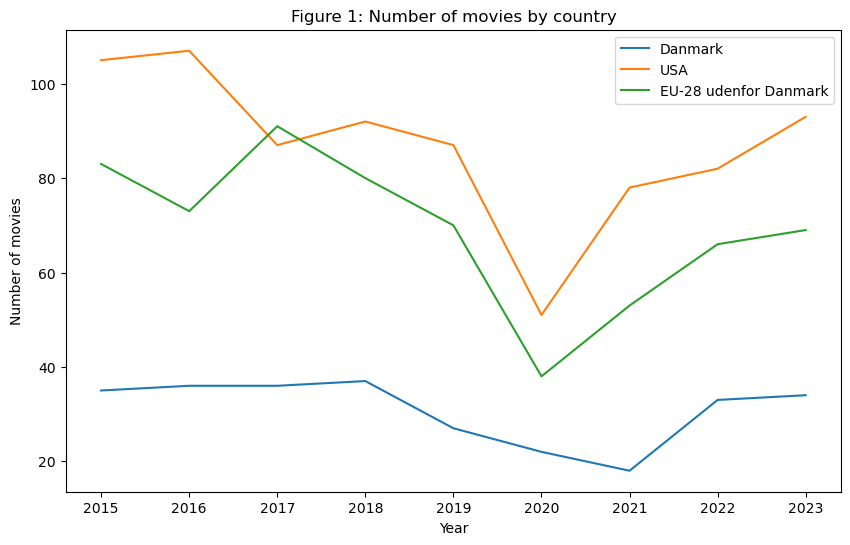

In [8]:
# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define filtered DataFrame for Denmark
filtered_bio_dk_movies = filtered_bio[(filtered_bio['Country'] == 'Danmark') & (filtered_bio['Type'] == 'Film (antal)')]

# Define filtered DataFrame for USA
filtered_bio_usa_movies = filtered_bio[(filtered_bio['Country'] == 'USA') & (filtered_bio['Type'] == 'Film (antal)')]

# Define filtered DataFrame for EU-28 excluding Denmark
filtered_bio_eu_movies = filtered_bio[(filtered_bio['Country'] == 'EU-28 udenfor Danmark') & (filtered_bio['Country'] != 'Danmark') & (filtered_bio['Type'] == 'Film (antal)')]

# Plot for Danmark
ax.plot(filtered_bio_dk_movies['Year'], filtered_bio_dk_movies['Value'], label='Danmark')

# Plot for USA
ax.plot(filtered_bio_usa_movies['Year'], filtered_bio_usa_movies['Value'], label='USA')

# Plot for EU-28 udenfor Danmark
ax.plot(filtered_bio_eu_movies['Year'], filtered_bio_eu_movies['Value'], label='EU-28 udenfor Danmark')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of movies')
ax.set_title('Figure 1: Number of movies by country')

# Add legend
ax.legend()

# Show the plot
plt.show()

Figure 1 shows the development in number of presented movies in Denmark, the United States and the EU-28. We see that the number of movies presented in Denmark generally lies at a lower level, which is not surprising. The US presents the highest number of movies - around 90 movies in 2023. We notice, that the number of movies for Denmark seems to be more stable across the period, related to movies in the US and the EU. Specifically, the number of presented movies drops considerably in 2020, due to the outbreak and lockdown following the pandemic, however less notably in Denmark. For all areas/countries, the number of movies has been increasing since the 2021, while the levels are still lower than it's peak. 


We focus on the following censorship groups: Advised against for children under 7 years, allowed for people over 15 years, and allowed for everyone. This allows us to analyze how the development of movies has been looking from different perspectives. For example we could ask - has the structure of censorship for movies changed over the last 8 years? 

**Figure 2**

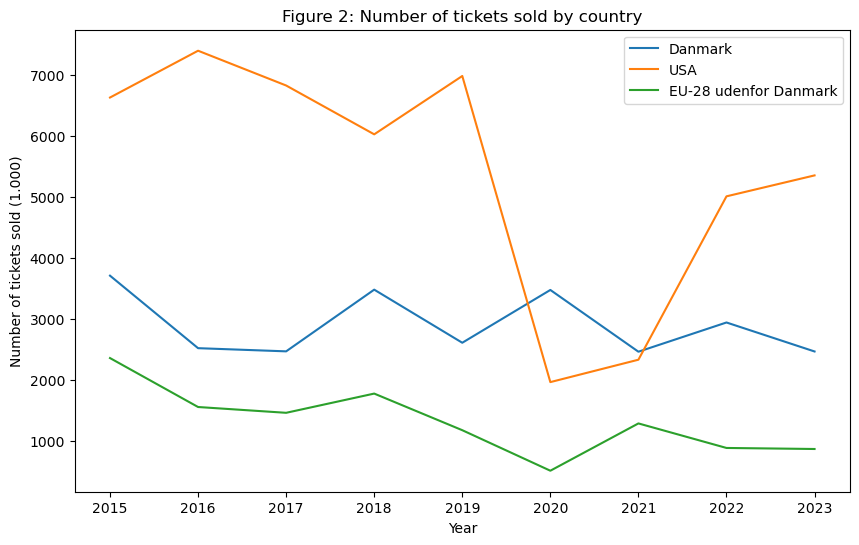

In [9]:
# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define filtered DataFrame for Denmark
filtered_bio_dk_tickets = filtered_bio[(filtered_bio['Country'] == 'Danmark') & (filtered_bio['Type'] == 'Solgte billetter (1.000)')]

# Define filtered DataFrame for USA
filtered_bio_usa_tickets = filtered_bio[(filtered_bio['Country'] == 'USA') & (filtered_bio['Type'] == 'Solgte billetter (1.000)')]

# Define filtered DataFrame for EU-28 excluding Denmark
filtered_bio_eu_tickets = filtered_bio[(filtered_bio['Country'] == 'EU-28 udenfor Danmark') & (filtered_bio['Country'] != 'Danmark') & (filtered_bio['Type'] == 'Solgte billetter (1.000)')]

# Plot for Danmark
ax.plot(filtered_bio_dk_tickets['Year'], filtered_bio_dk_tickets['Value'], label='Danmark')

# Plot for USA
ax.plot(filtered_bio_usa_tickets['Year'], filtered_bio_usa_tickets['Value'], label='USA')

# Plot for EU-28 udenfor Danmark
ax.plot(filtered_bio_eu_tickets['Year'], filtered_bio_eu_tickets['Value'], label='EU-28 udenfor Danmark')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of tickets sold (1.000)')
ax.set_title('Figure 2: Number of tickets sold by country')

# Add legend
ax.legend()

# Show the plot
plt.show()

Figure 2 shows the number of tickets sold for the US, Denmark and EU-28 excluding Denmark. The US seems to have sold a significant larger amount of tickets for cinema movies relative Denmark and the EU-28, in the beggining of the period. In this period the US have sold around 6000-7000 tickets a year, whereas Denmark has sold between 2500-4000 tickets a year and the EU-28 between 1000-2500 a year. In the prioden 2019-2020 Covid-19 happens, which indead is visble in the data. In this period the amount of tickets sold in the US decreases with almost 5000 sold tickets which makes Danmark the most ticket-selling country. It actually seems like Denmark is relatively unaffected by the crises, whereas The EU-28 decreses a bit, but not at all in the same range as the US. From 2021 and foreward the US ticket sale increases again. From this it seems like the cinemas has been affected the most in the US, relative to Denmark and the EU-28, due to Covid-19. 

To further see the difference in tickets sold, we dive into tickets sold in 2020 based on the movie type. 

**Figure 3a and 3b**

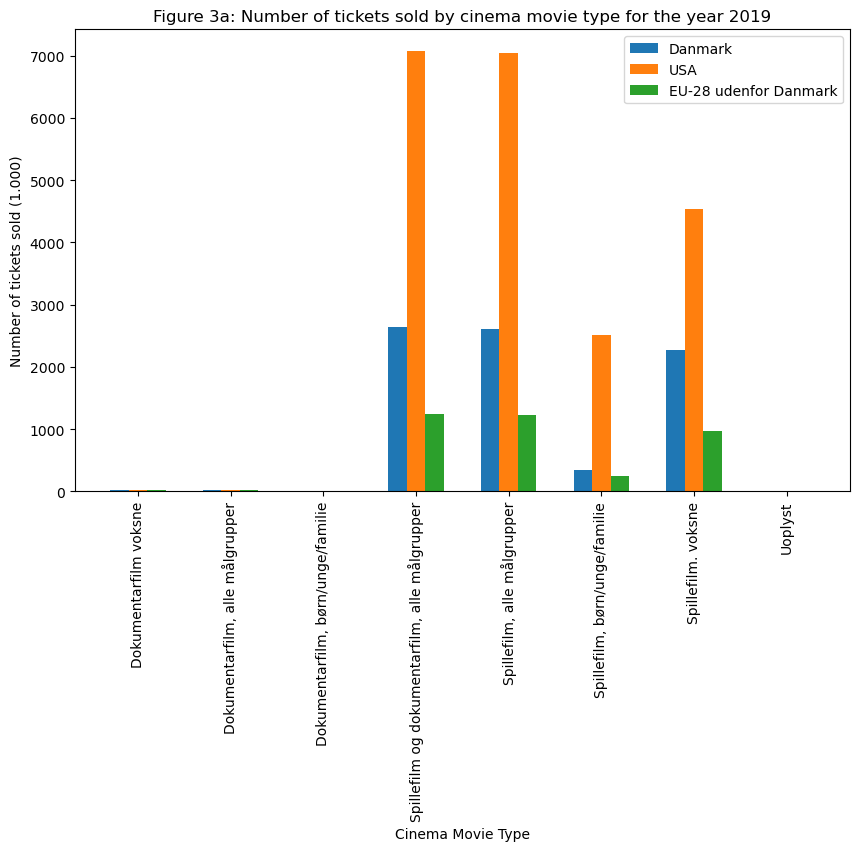

In [29]:
# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define filtered DataFrame for Denmark for the year 2019
filtered_bio_dk_2020 = bio_melted[(bio_melted['Country'] == 'Danmark') & (bio_melted['Year'] == 2019) & (bio_melted['Censorship'] == 'Alle censurforhold')]

# Define filtered DataFrame for USA for the year 2019
filtered_bio_usa_2020 = bio_melted[(bio_melted['Country'] == 'USA') & (bio_melted['Year'] == 2019) & (bio_melted['Censorship'] == 'Alle censurforhold')]

# Define filtered DataFrame for EU-28 excluding Denmark for the year 2019
filtered_bio_eu_2020 = bio_melted[(bio_melted['Country'] == 'EU-28 udenfor Danmark') & (bio_melted['Country'] != 'Danmark') & (bio_melted['Year'] == 2019) & (bio_melted['Censorship'] == 'Alle censurforhold')]

# Group the filtered DataFrames by the movie type 'Cinema_movie' and sum the values
grouped_bio_dk_2020 = filtered_bio_dk_2020.groupby('Cinema_movies')['Value'].sum().reset_index()
grouped_bio_usa_2020 = filtered_bio_usa_2020.groupby('Cinema_movies')['Value'].sum().reset_index()
grouped_bio_eu_2020 = filtered_bio_eu_2020.groupby('Cinema_movies')['Value'].sum().reset_index()

# Define the width of each bar
bar_width = 0.2

# Define the positions for the bars
bar_positions_dk = np.arange(len(grouped_bio_dk_2020['Cinema_movies']))
bar_positions_usa = np.arange(len(grouped_bio_usa_2020['Cinema_movies'])) + bar_width
bar_positions_eu = np.arange(len(grouped_bio_eu_2020['Cinema_movies'])) + 2 * bar_width

# Plot for Danmark
ax.bar(bar_positions_dk, grouped_bio_dk_2020['Value'], width=bar_width, label='Danmark')

# Plot for USA
ax.bar(bar_positions_usa, grouped_bio_usa_2020['Value'], width=bar_width, label='USA')

# Plot for EU-28 udenfor Danmark
ax.bar(bar_positions_eu, grouped_bio_eu_2020['Value'], width=bar_width, label='EU-28 udenfor Danmark')

# Set x-axis tick positions and labels
ax.set_xticks(bar_positions_usa)
ax.set_xticklabels(grouped_bio_usa_2020['Cinema_movies'])

# Set labels and title
ax.set_xlabel('Cinema Movie Type')
ax.set_ylabel('Number of tickets sold (1.000)')
ax.set_title('Figure 3a: Number of tickets sold by cinema movie type for the year 2019')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add legend
ax.legend()

# Show the plot
plt.show()

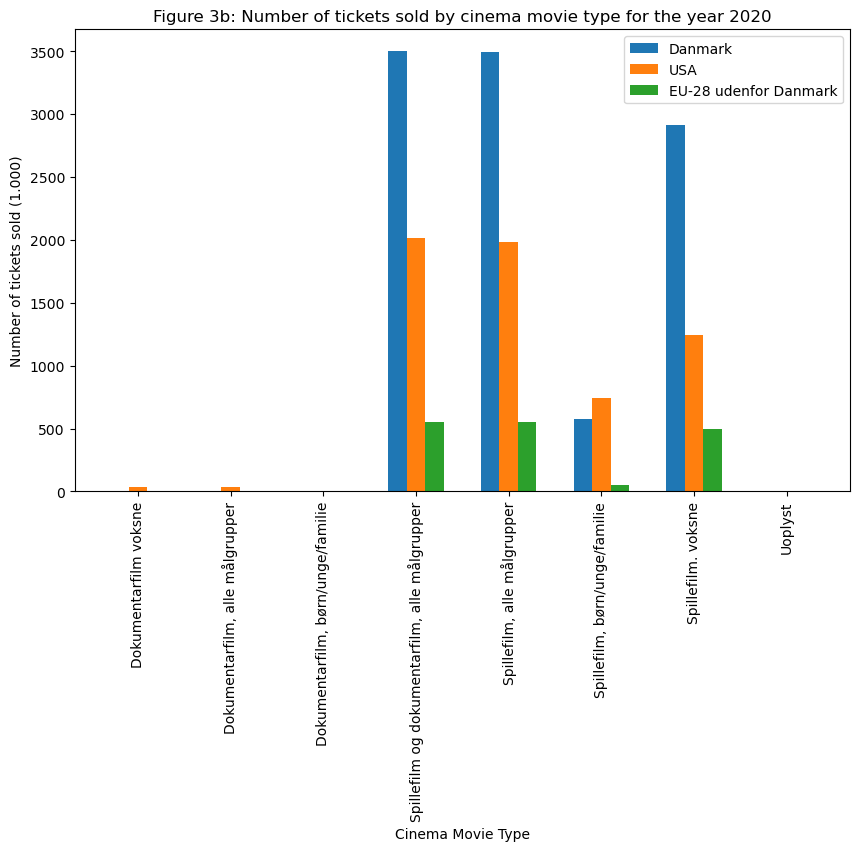

In [30]:
# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define filtered DataFrame for Denmark for the year 2020
filtered_bio_dk_2020 = bio_melted[(bio_melted['Country'] == 'Danmark') & (bio_melted['Year'] == 2020) & (bio_melted['Censorship'] == 'Alle censurforhold')]

# Define filtered DataFrame for USA for the year 2020
filtered_bio_usa_2020 = bio_melted[(bio_melted['Country'] == 'USA') & (bio_melted['Year'] == 2020) & (bio_melted['Censorship'] == 'Alle censurforhold')]

# Define filtered DataFrame for EU-28 excluding Denmark for the year 2020
filtered_bio_eu_2020 = bio_melted[(bio_melted['Country'] == 'EU-28 udenfor Danmark') & (bio_melted['Country'] != 'Danmark') & (bio_melted['Year'] == 2020) & (bio_melted['Censorship'] == 'Alle censurforhold')]

# Group the filtered DataFrames by the movie type 'Cinema_movie' and sum the values
grouped_bio_dk_2020 = filtered_bio_dk_2020.groupby('Cinema_movies')['Value'].sum().reset_index()
grouped_bio_usa_2020 = filtered_bio_usa_2020.groupby('Cinema_movies')['Value'].sum().reset_index()
grouped_bio_eu_2020 = filtered_bio_eu_2020.groupby('Cinema_movies')['Value'].sum().reset_index()

# Define the width of each bar
bar_width = 0.2

# Define the positions for the bars
bar_positions_dk = np.arange(len(grouped_bio_dk_2020['Cinema_movies']))
bar_positions_usa = np.arange(len(grouped_bio_usa_2020['Cinema_movies'])) + bar_width
bar_positions_eu = np.arange(len(grouped_bio_eu_2020['Cinema_movies'])) + 2 * bar_width

# Plot for Danmark
ax.bar(bar_positions_dk, grouped_bio_dk_2020['Value'], width=bar_width, label='Danmark')

# Plot for USA
ax.bar(bar_positions_usa, grouped_bio_usa_2020['Value'], width=bar_width, label='USA')

# Plot for EU-28 udenfor Danmark
ax.bar(bar_positions_eu, grouped_bio_eu_2020['Value'], width=bar_width, label='EU-28 udenfor Danmark')

# Set x-axis tick positions and labels
ax.set_xticks(bar_positions_usa)
ax.set_xticklabels(grouped_bio_usa_2020['Cinema_movies'])

# Set labels and title
ax.set_xlabel('Cinema Movie Type')
ax.set_ylabel('Number of tickets sold (1.000)')
ax.set_title('Figure 3b: Number of tickets sold by cinema movie type for the year 2020')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add legend
ax.legend()

# Show the plot
plt.show()

From figur 3a and 3b we see that the sale of tickets in the US decreases in total, given by the category "Spillefilm of dokumentarfilm, alle målgrupper". Though the US still sell more tickets within documentaries and movies for children/youth/family than Denmark and EU-28. For all categories though the US ticket sale has fallen, which might imply that a lot of the cinemas have been closed down in the period during Covid-19 or just very restricted. A like-wise decrease seems to be the case for the EU-28, whereas the opposite seems to be the case for Denmark, where we actually see an increase in sold tickets for the cinema movie types for Denmark.

NameError: name 'filtered_bio_censorship' is not defined

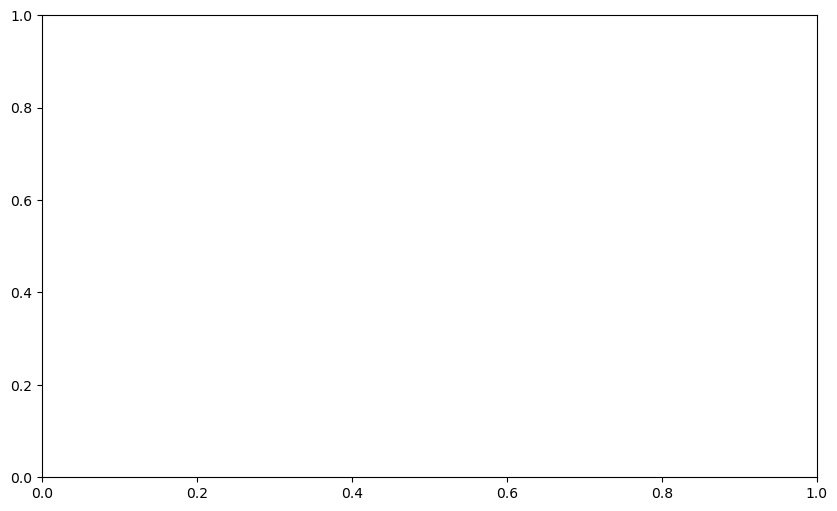

In [12]:
# Creating a plot showing the censorship groups.
fig, ax = plt.subplots(figsize=(10, 6))

# Define filtered DataFrame for Denmark
filtered_bio_censorship_dk = filtered_bio_cencorship[(filtered_bio_censorship['Country'] == 'Danmark') & (filtered_bio_censorship['Type'] == 'Film (antal)') & (filtered_bio_censorship['Censorship'] == 'Film (antal)')]

# Define filtered DataFrame for USA
filtered_bio_usa_movies = filtered_bio[(filtered_bio['Country'] == 'USA') & (filtered_bio['Type'] == 'Film (antal)')]

# Define filtered DataFrame for EU-28 excluding Denmark
filtered_bio_eu_movies = filtered_bio[(filtered_bio['Country'] == 'EU-28 udenfor Danmark') & (filtered_bio['Country'] != 'Danmark') & (filtered_bio['Type'] == 'Film (antal)')]

# Plot for Danmark
ax.plot(filtered_bio_dk_movies['Year'], filtered_bio_dk_movies['Value'], label='Danmark')

# Plot for USA
ax.plot(filtered_bio_usa_movies['Year'], filtered_bio_usa_movies['Value'], label='USA')

# Plot for EU-28 udenfor Danmark
ax.plot(filtered_bio_eu_movies['Year'], filtered_bio_eu_movies['Value'], label='EU-28 udenfor Danmark')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of movies')
ax.set_title('Figure 1: Number of movies by country')

# Add legend
ax.legend()

# Show the plot
plt.show()

Andel

In [ ]:
# Fistly we define a list of selected countries
selected_countries = ['Danmark', 'USA', 'EU-28 udenfor Danmark']

# Then we iterate over selected countries, creating a share in terms of censorship categories for each country
for country in selected_countries:
    # Filter the data for the current country and type
    filtered_data_movies = filtered_bio_cencorship[filtered_bio_cencorship['Country'] == country]
    filtered_data_movies = filtered_bio_cencorship[filtered_bio_cencorship['Type'] == 'Film (antal)']
    
    # Create a new plot for the current country
    plt.figure(figsize=(12, 8))
    sns.barplot(data=filtered_data_movies, x='Year', y='Share', hue='Censorship', ci=None)
    plt.title(f'Movies: Share of Censorship Categories by Year, {country}')
    plt.xlabel('Year')
    plt.ylabel('Share')
    plt.legend(title='Censorship')
    plt.show()

#The same as above but for sold tickets
for country in selected_countries:
    # Filter the data for the current country and type
    filtered_data_tickets = filtered_bio_cencorship[filtered_bio_cencorship['Country'] == country]
    filtered_data_tickets = filtered_bio_cencorship[filtered_bio_cencorship['Type'] == 'Solgte billetter (1.000)']
    
    # Create a new plot for the current country
    plt.figure(figsize=(12, 8))
    sns.barplot(data=filtered_data_tickets, x='Year', y='Share', hue='Censorship', ci=None)
    plt.title(f'Tickets sold: Share of Censorship Categories by Year, {country}')
    plt.xlabel('Year')
    plt.ylabel('Share')
    plt.legend(title='Censorship')
    plt.show()
    

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Conclusion

This is our conclusion. It is a nice conclusion.

nej nej 